### The Iris dataset in scikit-learn

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
print(type(iris))
# Bunch, similar to key value pairs in dictionary
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
iris.data.shape

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [12]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


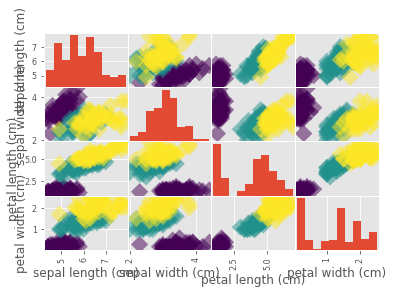

In [19]:
# Visal EDA
_ = pd.plotting.scatter_matrix(df, c = y, 
                               s = 150, marker = 'D')
# c: color by species

### k-Nearest neighbours
### Scikit-learn fit and predict
* All machine learning model implemented as Python classes
* Training a model on the data = 'fitting' a model to the data: .fit()
* To predict the labels of new data : .predict() methord

In [21]:
# Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iris['data'], iris['target'])
# datasets must be no missing values and features take on continous values
# Must be numpy arrary or pandas dataframe

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
# Practice
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

In [ ]:
# Practice
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df.party.values
X = df.drop('party', axis = 1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

### Measuring model performance
* In calssification, accuracy is a common used matric
* Accuracy = Fraction of corret predictions
* Which data should be used to compute accuracy?
* Split data into training and test set

In [25]:
# Train/Test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 21, 
                                                    stratify = y)
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [26]:
# Check accuracy 
knn.score(X_test, y_test)

0.9555555555555556

### Model complexity 
* Larger k = smoother decition boundary = less complex model
* Smaller k = more complex model = can lead to overfitting

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

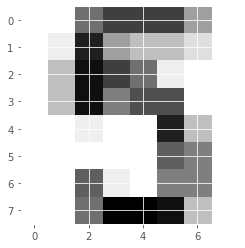

In [28]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show();

In [29]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


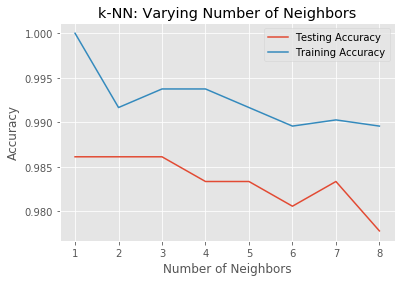

In [31]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show();

### Introduction to regression

In [ ]:
# Boston housing data
boston = pd.read_csv()
# Creating feature and target arrays
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

X_rooms = X[:, 5]
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

# Fitting a regression model
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), 
                               max(X_rooms).reshape(-1, 1))
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color = 'black', linewidth = 3)
plt.show()

### The basic of linear regression
* Regression mechanics

    y = ax + b
    
    y = target
    
    x = single feature
    
    a, b = parameters of model
    

* Define an error function for any given line

    Choose the line that minimize the error function
    
    
* The loss function

    Ordinary least squares (OLS): minimize the sum of squares of residuals

In [33]:
# Linear regression on all features 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=21)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.5571165234712666

In [34]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5816543438880973
Root Mean Squared Error: 1.8285553709339555


### Cross-validation 
* Model performance is depend on way the data was split 
* Not representative of the model's ability to generalize 
* Solution: cross-validation (k folds = k-fold CV)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np 

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = 5) # 5 fold CV
print(cv_results)
print(np.mean(cv_results))

[0.48346048 0.5583603  0.57534522 0.5056632  0.40995457]
0.5065567550630694


### Regularized regression 
* Ridge regression 

In [37]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.5802107027724188

### Lasso Regression
* Can be used to select important features of a data set

In [38]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

-0.0007353636370792671

In [ ]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso
names = boston.drop('MEDV', axis = 1).columns
lasso = Lasso(alpha = 0.1)
lass_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lass_coef)
_ = plt.xticks(range(len(names)), name, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

In [39]:
# Regularization I: Ridge
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

[ 0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
  0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.
  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0.
  0. -0. -0. -0.  0. -0. -0. -0. -0. -0.]


NameError: name 'df_columns' is not defined

In [ ]:
# Regularization II: Ridge
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### Confusion matrix in scikit-learn

In [43]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  1 80  1  0  0  1]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  4  0  0  0  0  0  0 61  0]
 [ 0  0  0  1  1  1  0  0  0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.95      1.00      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99        71
           4       0.97      1.00      0.99        78
           5       0.99      0.96      0.98        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       0.98      0.94      0.96        65
           9       0.99      0.96      0.97        77

    accuracy                           0.98       719
   macro avg       

### Logistic regression and the ORC curve
* Logistic regression for binary classification
* By defalut, logistic regression threshold = 0.5
* By choosing defferent threshold number, we can have the ROC curve

In [47]:
# Building a logistic regression model
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/yangyilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[66  0  0  0  1  0  0  0  0  0]
 [ 0 66  2  0  0  0  0  0  4  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  1  0  0 76  0  0  0  1  0]
 [ 0  2  1  0  0 78  0  1  1  0]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  2  0  0  0  1  0  0 62  0]
 [ 0  1  0  1  0  0  0  1  5 69]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.92      0.92      0.92        72
           2       0.96      1.00      0.98        66
           3       0.99      0.97      0.98        71
           4       0.99      0.97      0.98        78
           5       0.96      0.94      0.95        83
           6       1.00      0.99      0.99        69
           7       0.97      0.99      0.98        71
           8       0.84      0.95      0.89        65
           9       0.99      0.90      0.94        77

    accuracy                           0.96       719
   macro avg       

In [48]:
# Plot the ROC curve
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: multiclass format is not supported

### Area under the ROC curve
* Larger area under the curve = better model

In [ ]:
# AUC in scikit-learn 
from sklearn.metrics import roc_auc_score

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_pred_prob)

In [ ]:
# AUC using cross-validation 
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

### Hyperparameter tuning
* Grid search cross-validation

In [ ]:
# GridSearchCV in skit-learn 
from sklearn.model_selection import GridSearchCV
# specify the hyperparameter 
param_grid = {'n_neighbors': np.arange(1 : 50)}
knn = KNeighborClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, y)
knn_cv.best_params_
knn_cv.best_score_

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

### Hold-out set reasoning 
* Split data into training and hold-out set at the begining 
* Perform grid search cross-validation on training set 
* Chose best hyperparameters and evaluate on hold-out set 

In [ ]:
# Hold-out set in practice I: Classification
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

In [ ]:
# Hold-out set in practice II: Regression
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

### Preprocessing data
* Dealing with categorical features

    scikit-learn: OneHotEncoder()
    
    pandas: get_dummies()

In [ ]:
import pandas as pd
df_origin = pd.get_dummies()
df_origin = df_origin.drop('origin_Asia', axis = 1)

In [ ]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

In [ ]:
# Regression with categorical features
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X, y, cv = 5)

# Print the cross-validated scores
print(ridge_cv)

### Handling missing data 

In [ ]:
import pandas as pd
# droping missing data 
df.insulin.replace(0, np.nan, inplace = True)
df.triceps.replace(0, np.nan, inplace = True)
df.bmi.replace(0, np.nan, inplace = True)
df.info()

df.dropna()

### Imputing missing data 
* Making an educated guess about missing values

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp.fit(X)
imp.transform(X)

* Imputing with a pipline 

In [ ]:
from sklearn.pipline import Pipline 
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipline = Pipline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
pipline.fit(X_train, y_train)
y_pred = pipline.predict(X_test)
pipline.score(X_test, y_test)

In [ ]:
# Dropping missing data
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

In [ ]:
# Imputing missing data in a ML Pipeline I
# Import the Imputer module
from sklearn.preprocessing import Imputer 
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [ ]:
# Imputing missing data in a ML Pipeline II
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

### Centering and scaling 

In [ ]:
# Scaling in scikit-learn 
from sklearn.preprocessing import scale
X_scaled = scale(X)

# Scaling in a pipline 
from sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

knn_unscaling = KNeighboursClassifier().fit(X_train, y_train)
knn_unscaling.score(X_test, y_test)

### CV and scaling in a pipeline 


In [ ]:
steps = [('scaler', StandardScaler()), ('knnt', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {knn__n_neighbors: np.arange(1: 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 21)
cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
# Centering and scaling in a pipeline
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv = 3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

In [ ]:
# Bringing it all together II: Pipeline for regression
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv = 3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))